In [1]:
#les importations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score 
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#chargement des données
df=pd.read_csv("../data/df_features.csv")
df=df.drop(columns=["Unnamed: 0" , "num_ref_in"],errors='ignore')


In [3]:
#séparation
X=df.drop(columns=["etiquette"])
y=df["etiquette"]

In [4]:
#Split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y) 

In [5]:
#Entrainement
model = RandomForestClassifier(n_estimators=100 , random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
#Prédiction et évaluation
y_pred = model.predict(X_test)
print("Accuracy:" , accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))
      

Accuracy: 0.9861578750467639
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2472
           1       0.98      0.99      0.99      2874

    accuracy                           0.99      5346
   macro avg       0.99      0.99      0.99      5346
weighted avg       0.99      0.99      0.99      5346



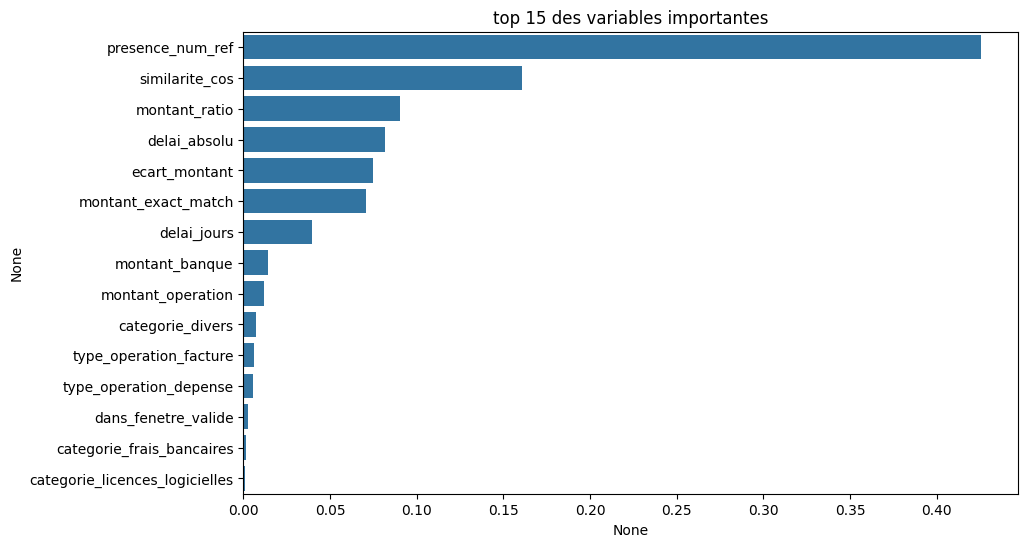

In [7]:
#Importance des features
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("top 15 des variables importantes")

plt.show()

In [8]:
#sauvegarde du modèle 
joblib.dump(model,"../models/random_forest_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '../models/random_forest_model.pkl'